## Testes Biblioteca "frbs"

In [2]:
install.packages("frbs") #rodar somente uma vez

Installing package into ‘/home/arnaldonot/R/i686-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [3]:
library(frbs)#carregando as funções

In [4]:
library(help=frbs) # documentação da biblioteca

### Exemplo 1 -  Simulando Regressão

Prevendo um output baseado com o input de uma função

2 variáveis de input $x \in [-2,2]$ e  $y \in [-2,2]$


$$ f(x,y) = \frac{1}{x^{4} + y^{4} -2x^{2} - 2y^{2} +3 } $$

In [13]:
fun <- function(input.xy){ z <- 1/(input.xy[1]^4+input.xy[2]^4 -2*input.xy[1]^2-2*input.xy[2]^2+3)}

In [14]:
fun

function(input.xy){ z <- 1/(input.xy[1]^4+input.xy[2]^4 -2*input.xy[1]^2-2*input.xy[2]^2+3)}

In [15]:
input.xy <- expand.grid(seq(-2, 2, by = 0.14),
    + seq(-2, 2, by = 0.14))

In [16]:
input.xy

Var1,Var2
-2.00,-2.00
-1.86,-2.00
-1.72,-2.00
-1.58,-2.00
-1.44,-2.00
-1.30,-2.00
-1.16,-2.00
-1.02,-2.00
-0.88,-2.00
-0.74,-2.00


In [17]:
z<- apply(input.xy, 1, fun)

In [18]:
z

[1] 0.05263158 0.06230672 0.07227872 0.08170460 0.08966505 0.09545537
  [7] 0.09881970 0.09998368 0.09949362 0.09799439 0.09606517 0.09414800
 [13] 0.09254387 0.09143902 0.09093552 0.09107385 0.09184324 0.09317883
 [19] 0.09494588 0.09691287 0.09872058 0.09986469 0.09972387 0.09767023
 [25] 0.09326775 0.08648649 0.07779227 0.06801815 0.05808299 0.06230672
 [31] 0.07634017 0.09186986 0.10765601 0.12191778 0.13287744 0.13948808
 [37] 0.14181854 0.14083461 0.13784932 0.13406206 0.13035759 0.12730230
 [43] 0.12522098 0.12427864 0.12453716 0.12598029 0.12850690 0.13189222
 [49] 0.13571873 0.13929066 0.14157927 0.14129640 0.13720872 0.12867608
 [55] 0.11611526 0.10096543 0.08509486 0.07009488 0.07227872 0.09186986
 [61] 0.11533146 0.14135188 0.16700213 0.18827319 0.20182572 0.20674131
 [67] 0.20465693 0.19841284 0.19066029 0.18325406 0.17727302 0.17326277
 [73] 0.17146385 0.17195631 0.17471984 0.17961764 0.18630138 0.19402865
 [79] 0.20141269 0.20623321 0.20563356 0.19708841 0.17994833 0.15630298
 [85] 0.13003768 0.10485160 0.08297326 0.08170460 0.10765601 0.14135188
 [91] 0.18253418 0.22769552 0.26915633 0.29773847 0.30856149 0.30394136
 [97] 0.29037027 0.27406173 0.25901451 0.24722498 0.23949441 0.23607090
[103] 0.23700541 0.24228734 0.25180898 0.26514445 0.28107571 0.29684046
[109] 0.30743105 0.30610040 0.28754244 0.25245939 0.20825901 0.16409688
[115] 0.12592600 0.09563925 0.08966505 0.12191778 0.16700213 0.22769552
[121] 0.30255045 0.38041372 0.44012993 0.46419887 0.45382093 0.42421725
[127] 0.39028701 0.36046538 0.33803167 0.32374333 0.31751883 0.31921173
[133] 0.32886789 0.34666031 0.37244876 0.40466755 0.43817044 0.46164515
[139] 0.45865123 0.41820855 0.34789420 0.26917053 0.19970583 0.14588795
[145] 0.10673085 0.09545537 0.13287744 0.18827319 0.26915633 0.38041372
[151] 0.51224260 0.62674731 0.67671262 0.65488084 0.59496690 0.53030705
[157] 0.47671837 0.43825324 0.41453359 0.40438310 0.40713297 0.42297288
[163] 0.45286751 0.49790478 0.55721253 0.62278134 0.67129910 0.66498693
[169] 0.58321465 0.45497558 0.32909893 0.23090165 0.16186315 0.11503714
[175] 0.09881970 0.13948808 0.20182572 0.29773847 0.44012993 0.62674731
[181] 0.80718151 0.89200375 0.85445641 0.75522705 0.65400540 0.57437795
[187] 0.51944676 0.48645488 0.47253577 0.47629495 0.49811783 0.54010533
[193] 0.60541647 0.69541671 0.80061528 0.88262163 0.87174206 0.73639117
[199] 0.54310649 0.37286451 0.25162376 0.17178005 0.11995896 0.09998368
[205] 0.14181854 0.20674131 0.30856149 0.46419887 0.67671262 0.89200375
[211] 0.99674630 0.95009392 0.82898261 0.70860063 0.61606448 0.55330608
[217] 0.51602731 0.50039163 0.50460906 0.52917055 0.57680654 0.65191245
[223] 0.75747274 0.88399184 0.98504590 0.97151412 0.80634320 0.58023073
[229] 0.38999550 0.25931052 0.17532815 0.12167852 0.09949362 0.14083461
[235] 0.20465693 0.30394136 0.45382093 0.65488084 0.85445641 0.95009392
[241] 0.90761338 0.79645665 0.68469920 0.59791808 0.53862446 0.50323451
[247] 0.48835328 0.49236942 0.51572627 0.56086926 0.63162754 0.73022404
[253] 0.84710202 0.93945731 0.92714124 0.77553653 0.56410630 0.38264398
[259] 0.25603975 0.17382677 0.12095350 0.09799439 0.13784932 0.19841284
[265] 0.29037027 0.42421725 0.59496690 0.75522705 0.82898261 0.79645665
[271] 0.70955626 0.61947668 0.54757306 0.49742545 0.46708989 0.45424228
[277] 0.45771497 0.47783251 0.51633767 0.57571123 0.65650695 0.74947588
[283] 0.82087335 0.81145468 0.69290450 0.51907984 0.36138059 0.24634098
[289] 0.16930144 0.11874495 0.09606517 0.13406206 0.19066029 0.27406173
[295] 0.39028701 0.53030705 0.65400540 0.70860063 0.68469920 0.61947668
[301] 0.54969217 0.49232598 0.45140903 0.42628476 0.41555807 0.41846257
[307] 0.43521446 0.46692941 0.51495529 0.57865436 0.64968815 0.70266713
[313] 0.69575432 0.60674658 0.46917075 0.33646243 0.23450243 0.16362438
[319] 0.11592395 0.09414800 0.13035759 0.18325406 0.25901451 0.36046538
[325] 0.47671837 0.57437795 0.61606448 0.59791808 0.54757306 0.49232598
[331] 0.44580184 0.41198712 0.39095726 0.3

In [19]:
data <- cbind(input.xy, z)

In [20]:
data

Var1,Var2,z
-2.00,-2.00,0.05263158
-1.86,-2.00,0.06230672
-1.72,-2.00,0.07227872
-1.58,-2.00,0.08170460
-1.44,-2.00,0.08966505
-1.30,-2.00,0.09545537
-1.16,-2.00,0.09881970
-1.02,-2.00,0.09998368
-0.88,-2.00,0.09949362
-0.74,-2.00,0.09799439


In [21]:
colnames(data)<- c("X","Y","Z")

In [22]:
data

X,Y,Z
-2.00,-2.00,0.05263158
-1.86,-2.00,0.06230672
-1.72,-2.00,0.07227872
-1.58,-2.00,0.08170460
-1.44,-2.00,0.08966505
-1.30,-2.00,0.09545537
-1.16,-2.00,0.09881970
-1.02,-2.00,0.09998368
-0.88,-2.00,0.09949362
-0.74,-2.00,0.09799439


In [23]:
cut.indx <- round(0.8*nrow(data))

In [24]:
cut.indx

[1] 673

In [25]:
data.tra <- data[1:cut.indx,]

In [26]:
data.tra #treino

X,Y,Z
-2.00,-2.00,0.05263158
-1.86,-2.00,0.06230672
-1.72,-2.00,0.07227872
-1.58,-2.00,0.08170460
-1.44,-2.00,0.08966505
-1.30,-2.00,0.09545537
-1.16,-2.00,0.09881970
-1.02,-2.00,0.09998368
-0.88,-2.00,0.09949362
-0.74,-2.00,0.09799439


In [28]:
data.tst <- data[(cut.indx+1):nrow(data),1:2]#dados para teste

In [29]:
data.tst

,X,Y
674,-1.16,1.22
675,-1.02,1.22
676,-0.88,1.22
677,-0.74,1.22
678,-0.60,1.22
679,-0.46,1.22
680,-0.32,1.22
681,-0.18,1.22
682,-0.04,1.22
683,0.10,1.22


In [30]:
real.val <- data[(cut.indx+1):nrow(data),3,drop=FALSE] #dados para avaliar a acurácia r

In [31]:
real.val

,Z
674,0.73639117
675,0.80634320
676,0.77553653
677,0.69290450
678,0.60674658
679,0.53760287
680,0.48918406
681,0.45981571
682,0.44735981
683,0.45072768


In [32]:
range.data <- apply(data,2,range) #definir o piso e o teto

In [33]:
range.data

X,Y,Z
-2.00,-2.00,0.05263158
1.92,1.92,0.99674630


In [34]:
#agora settar os parâmetros para a aprendizagem
method.type <- "WM" #Wand and Mendels method("WM")


In [39]:
method.type

[1] "WM"

In [37]:
#fourhill é o nome da simulação
control <- list(num.labels = 5,type.mf = "GAUSSIAN", type.defuz = "COG",type.tnorm = "MIN", type.snorm = "MAX",type.implication.func = "LUKASIEWICZ",name="fourhill")

In [38]:
control

$num.labels
[1] 5

$type.mf
[1] "GAUSSIAN"

$type.defuz
[1] "COG"

$type.tnorm
[1] "MIN"

$type.snorm
[1] "MAX"

$type.implication.func
[1] "LUKASIEWICZ"

$name
[1] "fourhill"

In [40]:
mod.reg <-frbs.learn(data.tra,range.data,method.type,control)

In [41]:
mod.reg

$num.labels
     [,1] [,2] [,3]
[1,]    5    5    5

$varout.mf
     very.small  small medium  large very.large
[1,]     5.0000 5.0000 5.0000 5.0000     5.0000
[2,]     0.0000 0.2500 0.5000 0.7500     1.0000
[3,]     0.0875 0.0875 0.0875 0.0875     0.0875
[4,]         NA     NA     NA     NA         NA
[5,]         NA     NA     NA     NA         NA

$rule
      [,1] [,2] [,3] [,4]         [,5]  [,6] [,7] [,8]         [,9]   [,10]
 [1,] "IF" "X"  "is" "very.small" "and" "Y"  "is" "very.small" "THEN" "Z"  
 [2,] "IF" "X"  "is" "small"      "and" "Y"  "is" "very.small" "THEN" "Z"  
 [3,] "IF" "X"  "is" "medium"     "and" "Y"  "is" "very.small" "THEN" "Z"  
 [4,] "IF" "X"  "is" "large"      "and" "Y"  "is" "very.small" "THEN" "Z"  
 [5,] "IF" "X"  "is" "very.large" "and" "Y"  "is" "very.small" "THEN" "Z"  
 [6,] "IF" "X"  "is" "small"      "and" "Y"  "is" "very.small" "THEN" "Z"  
 [7,] "IF" "X"  "is" "medium"     "and" "Y"  "is" "very.small" "THEN" "Z"  
 [8,] "IF" "X"  "is" "large"     

In [42]:
summary(mod.reg
       )

The name of model:  fourhill 
Model was trained using:  WM 
The names of attributes:  X Y Z 
The interval of training data:  
        X     Y          Z
min -2.00 -2.00 0.05263158
max  1.92  1.92 0.99674630
Type of FRBS model: 
[1] "MAMDANI"
Type of membership functions: 
[1] "GAUSSIAN"
Type of t-norm method: 
[1] "Standard t-norm (min)"
Type of s-norm method: 
[1] "Standard s-norm"
Type of defuzzification technique: 
[1] "modified COG"
Type of implication function: 
[1] "LUKASIEWICZ"
The names of linguistic terms on the input variables:  
 [1] "very.small" "small"      "medium"     "large"      "very.large"
 [6] "very.small" "small"      "medium"     "large"      "very.large"
The parameter values of membership function on the input variable (normalized):  
     very.small  small medium  large very.large very.small  small medium  large
[1,]     5.0000 5.0000 5.0000 5.0000     5.0000     5.0000 5.0000 5.0000 5.0000
[2,]     0.0000 0.2500 0.5000 0.7500     1.0000     0.0000 0.2500 0.5000

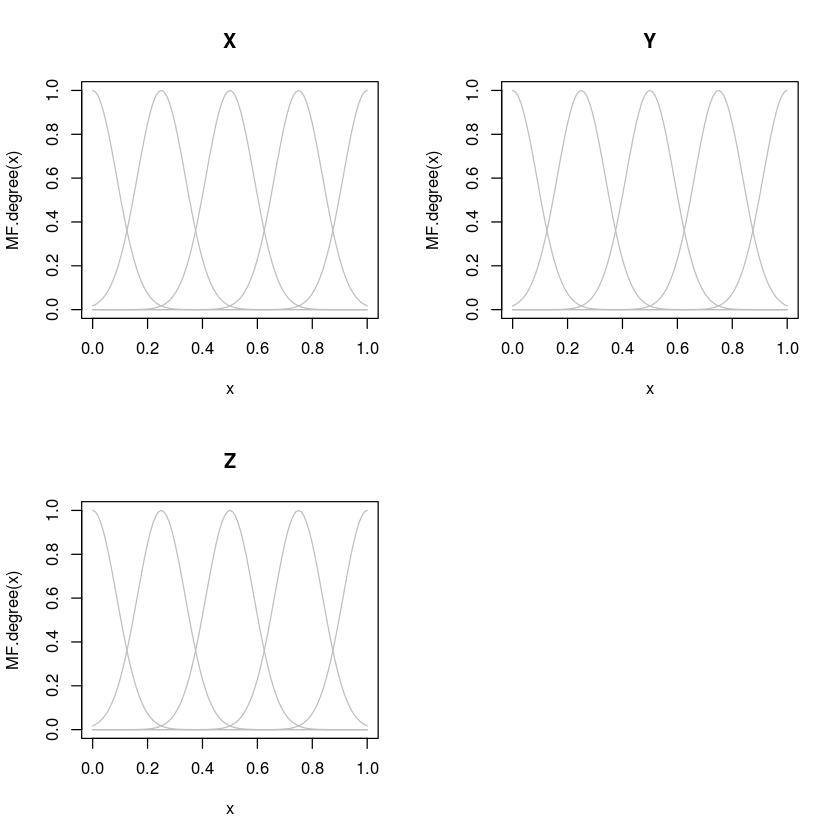

In [43]:
plotMF(mod.reg)

In [44]:
res.test <- predict(mod.reg,data.tst)

In [45]:
res.test

0.5559067
0.5575578
0.5581635
0.5583481
0.5583889
0.5228276
0.4581406
0.4359850
0.4254105
0.4359850
0.4581406


In [46]:
#comparar os valores encontrados com os valores reais....análise feita sobre o MSE Mean Square Error
err.MSE <-mean((real.val - res.test)^2)

In [47]:
err.MSE

[1] 0.07852261

## Problemas de Classificação também podem ser simulados 

In [48]:
data(iris)#carregando o dataset IRIS

In [49]:
set.seed(2)
irisShuffled <- iris[sample(nrow(iris)),]

In [50]:
irisShuffled

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,setosa
105,6.5,3.0,5.8,2.2,virginica
85,5.4,3.0,4.5,1.5,versicolor
25,4.8,3.4,1.9,0.2,setosa
138,6.4,3.1,5.5,1.8,virginica
137,6.3,3.4,5.6,2.4,virginica
19,5.7,3.8,1.7,0.3,setosa
120,6.0,2.2,5.0,1.5,virginica
67,5.6,3.0,4.5,1.5,versicolor
78,6.7,3.0,5.0,1.7,versicolor


In [51]:
#precisa converter a última coluna que é uma string em valores numéricos
irisShuffled[,5] <-unclass(irisShuffled[,5])

In [52]:
irisShuffled

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,1
105,6.5,3.0,5.8,2.2,3
85,5.4,3.0,4.5,1.5,2
25,4.8,3.4,1.9,0.2,1
138,6.4,3.1,5.5,1.8,3
137,6.3,3.4,5.6,2.4,3
19,5.7,3.8,1.7,0.3,1
120,6.0,2.2,5.0,1.5,3
67,5.6,3.0,4.5,1.5,2
78,6.7,3.0,5.0,1.7,2


In [53]:
tra.iris <-irisShuffled[1:105,]

In [54]:
#treino
tra.iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,1
105,6.5,3.0,5.8,2.2,3
85,5.4,3.0,4.5,1.5,2
25,4.8,3.4,1.9,0.2,1
138,6.4,3.1,5.5,1.8,3
137,6.3,3.4,5.6,2.4,3
19,5.7,3.8,1.7,0.3,1
120,6.0,2.2,5.0,1.5,3
67,5.6,3.0,4.5,1.5,2
78,6.7,3.0,5.0,1.7,2


In [55]:
#teste 
tst.iris <-irisShuffled[106:nrow(irisShuffled),1:4]

In [56]:
tst.iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
98,6.2,2.9,4.3,1.3
40,5.1,3.4,1.5,0.2
119,7.7,2.6,6.9,2.3
7,4.6,3.4,1.4,0.3
104,6.3,2.9,5.6,1.8
100,5.7,2.8,4.1,1.3
72,6.1,2.8,4.0,1.3
77,6.8,2.8,4.8,1.4
86,6.0,3.4,4.5,1.6
30,4.7,3.2,1.6,0.2


In [57]:
real.iris <-matrix(irisShuffled[106:nrow(irisShuffled),5],ncol = 1)

In [59]:
#necessário definir o intervalor de trabalho da variável de entrada piso e teto para cada variável
range.data.input <-apply(iris[,-ncol(iris)],2,range)

In [61]:
range.data.input

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
4.3,2.0,1.0,0.1
7.9,4.4,6.9,2.5


In [62]:
method.type <-"FRBCS.CHI"
control <-list(num.labels = 3, type.mf ="TRAPEZOID", type.tnorm = "MIN",type.snorm = "MAX",type.implication.func = "ZADEH") 

In [63]:
control #OK

$num.labels
[1] 3

$type.mf
[1] "TRAPEZOID"

$type.tnorm
[1] "MIN"

$type.snorm
[1] "MAX"

$type.implication.func
[1] "ZADEH"

In [64]:
mod.class <-frbs.learn(tra.iris, range.data.input,method.type,control)

In [65]:
mod.class

$num.labels
     [,1] [,2] [,3] [,4] [,5]
[1,]    3    3    3    3    3

$rule
      [,1] [,2]           [,3] [,4]     [,5]  [,6]          [,7] [,8]     [,9] 
 [1,] "IF" "Sepal.Length" "is" "small"  "and" "Sepal.Width" "is" "medium" "and"
 [2,] "IF" "Sepal.Length" "is" "large"  "and" "Sepal.Width" "is" "medium" "and"
 [3,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "large"  "and"
 [4,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "medium" "and"
 [5,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "medium" "and"
 [6,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "small"  "and"
 [7,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "small"  "and"
 [8,] "IF" "Sepal.Length" "is" "small"  "and" "Sepal.Width" "is" "large"  "and"
 [9,] "IF" "Sepal.Length" "is" "large"  "and" "Sepal.Width" "is" "large"  "and"
[10,] "IF" "Sepal.Length" "is" "small"  "and" "Sepal.Width" "is" "small"  "and"
[11,] "IF" "Sepal.Length" "is" "large"  "

In [68]:
res.test<-predict(mod.class,tst.iris)

In [69]:
res.test

2
1
3
1
3
2
2
2
2
1
2


In [70]:
summary(mod.class)

The name of model:  sim-0 
Model was trained using:  FRBCS.CHI 
The names of attributes:  Sepal.Length Sepal.Width Petal.Length Petal.Width Species 
The interval of input data:  
    Sepal.Length Sepal.Width Petal.Length Petal.Width
min          4.3         2.0          1.0         0.1
max          7.9         4.4          6.9         2.5
Type of FRBS model: 
[1] "FRBCS"
Type of membership functions: 
[1] "TRAPEZOID"
Type of t-norm method: 
[1] "Standard t-norm (min)"
Type of s-norm method: 
[1] "Standard s-norm"
Type of implication function: 
[1] "ZADEH"
The names of linguistic terms on the input variables:  
 [1] "small"  "medium" "large"  "small"  "medium" "large"  "small"  "medium"
 [9] "large"  "small"  "medium" "large" 
The parameter values of membership function on the input variable (normalized):  
     small medium large small medium large small medium large small medium
[1,]   2.0   4.00   3.0   2.0   4.00   3.0   2.0   4.00   3.0   2.0   4.00
[2,]   0.0   0.23   0.6   0.0   

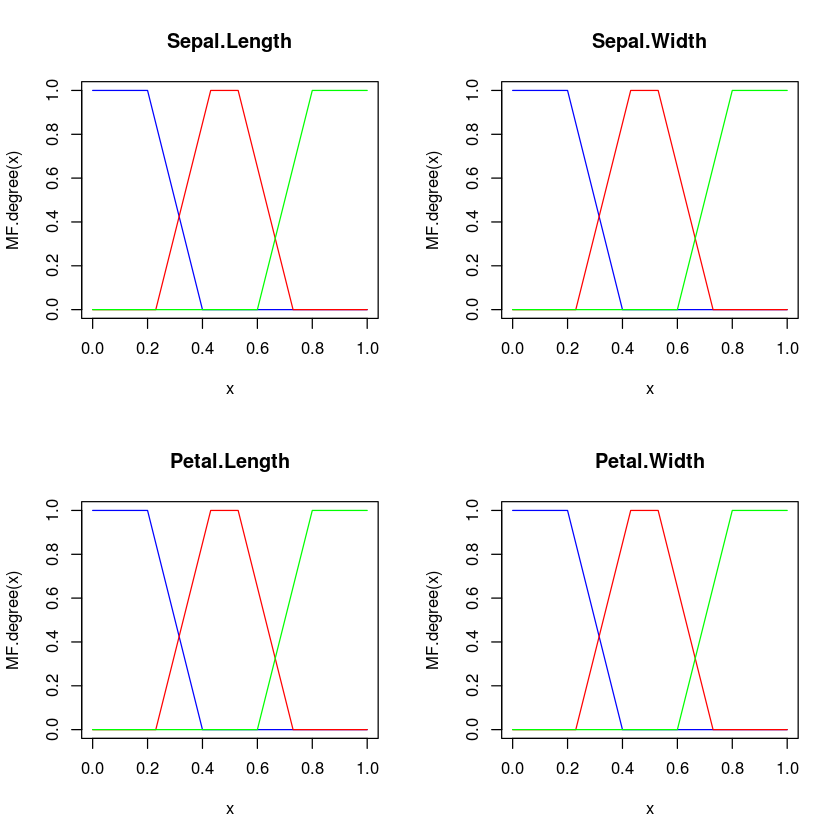

In [71]:
plotMF(mod.class)

In [72]:
err = 100*sum(real.iris!=res.test)/nrow(real.iris)

In [73]:
print(err)

[1] 4.444444
